                                                                             Pahul Brar, Damien Fung, Steve Kim, Rafi Meher

# Taking a look at Vehicular/Pedestrian accidents in the neighbourhoods of Vancouver

## Introduction:

Pedestrians are some of the most vulnerable users of roadways. On average, in British Columbia, around 50 pedestrians are killed and 2,400 are injured in around 2,700 crashes every year, based on a five-year average of data collected by ICBC between 2016 and 2020 (ICBC, 2021).​​ Nearly half of these deaths occur between October and January, likely due to decreased daylight and poor weather conditions. Governments and law enforcement are using various safety campaigns to try and deal with these issues, it is possible that more can be done to reduce pedestrian deaths in key regions in Metro Vancouver. 
 
The question understudy for our project is: "Are certain neighbourhoods more prone to vehicle collisions in the City of Vancouver?" The dataset we are planning on using was made available to us by the VPD, and it contains information on all crimes committed from 2003 to 2022 (VPD, 2022). We intend to look at neighbourhood-specific data across the city and we will specifically look at the “Vehicle Collision or Pedestrian Struck with Fatality” and “Vehicle Collision or Pedestrian Struck with Injury” related data. While the data values include both vehicle-to-vehicle collisions and pedestrian/cyclist strikes together, the description notes that vehicle-to-vehicle incidents are fewer in number when compared to the overall data set. We want to see if there is any discernible pattern for the neighbourhoods that have higher collision rates, such as if the neighbourhoods have lower government funding, lower socioeconomic status, or if collision rates are more evenly spread.
 
An article by Sarah Fecht in Scientific American that looked into road designs in Montreal found that “traffic injuries are four to six times higher in low-income areas of Montreal, compared with wealthy neighbourhoods” (Fecht, 2012). Fecht notes that there may be “many explanations for social inequalities in traffic injuries, including differences in the prevalence of drunk driving, use of helmets and safety restraints, and driving speeds”. However, citing a 2011 study on the influence of traffic volume and road design (Morency et al., 2012), Fetch suggests that “street environment” may also carry a large part of the blame”. As this would be a serious concern that could be mitigated through direct intervention, we wanted to further explore whether this may also be occurring in Vancouver as well.
 
 We plan on using the proportion of Vehicular/Pedestartain accidents compared to all other crimes in that neighbourhood, to approach this question. Looking at the proportion will help us weed out outliers, that way we are only looking at the neighbourhood that has a significantly higher number of Pedestrian/Vehicular accidents per all the crimes reported. We will also be drawing 95% Confidence Intervals for each proportion for better results. The 95CI will help us be more confident in our answers.

## Preliminary Results: 

In [64]:
set.seed(1)
library(dplyr)
library(tidyverse)
library(infer)

Rows: 818120 Columns: 10

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



TYPE,NEIGHBOURHOOD
<chr>,<chr>
Break and Enter Commercial,Oakridge
Break and Enter Commercial,Fairview
Break and Enter Commercial,West End
Break and Enter Commercial,West End
Break and Enter Commercial,West End
Break and Enter Commercial,West End


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


mean_crime_rate
<dbl>
34082.92


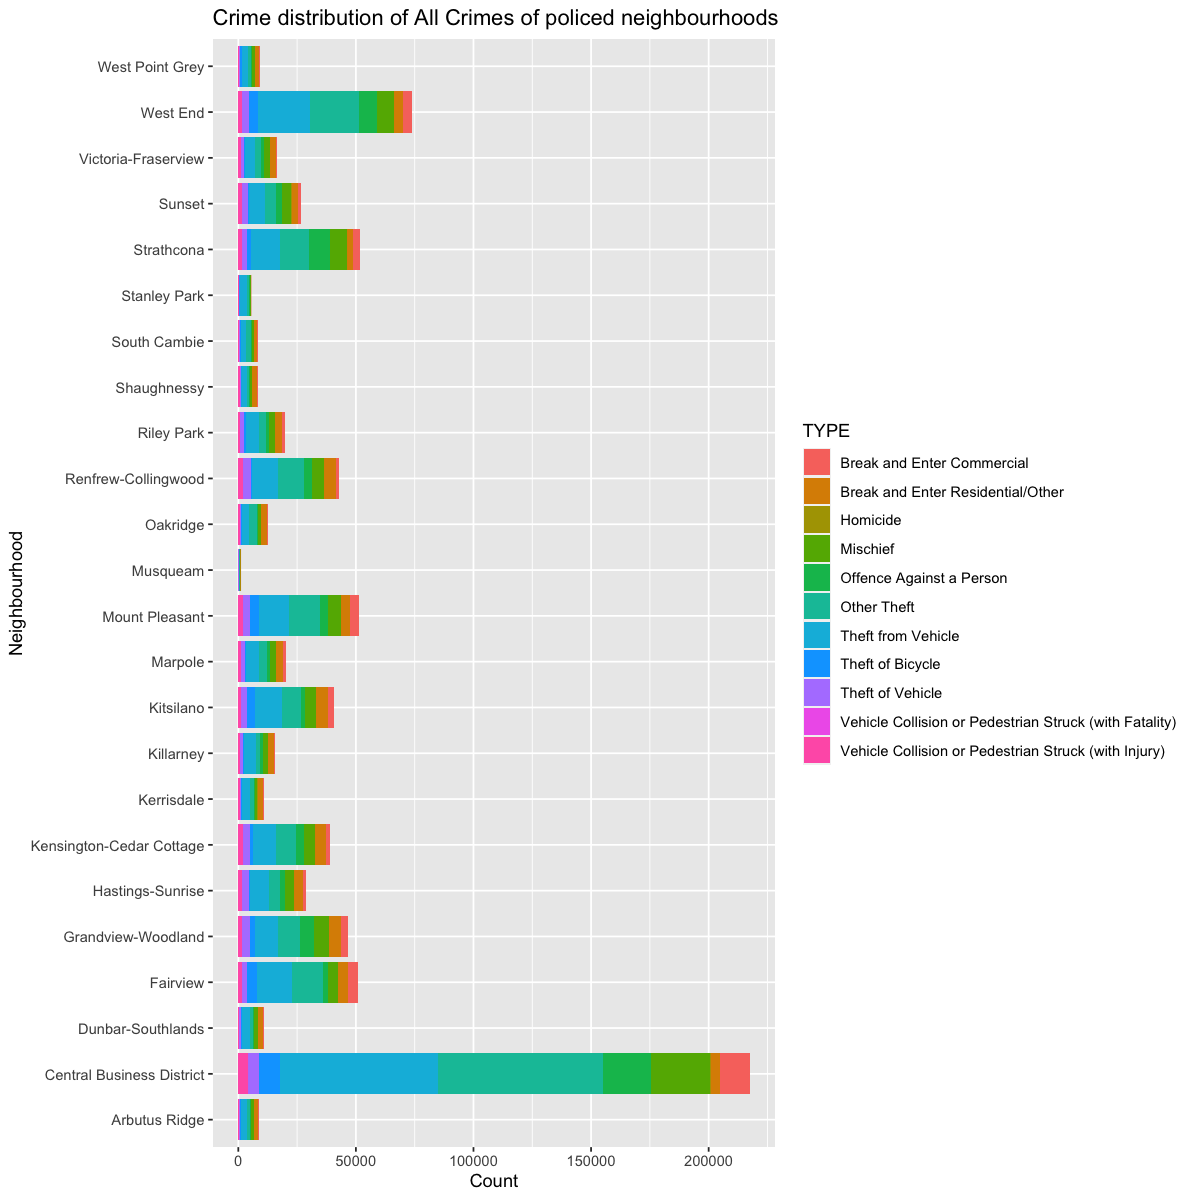

In [47]:
whole_dataset <- read_csv("https://raw.githubusercontent.com/pbrar17/group_14/main/crime_data.csv") %>%
    filter(!is.na(NEIGHBOURHOOD))

whole_dataset <- select(whole_dataset, TYPE, NEIGHBOURHOOD) %>%
    group_by(NEIGHBOURHOOD)

head(whole_dataset)


crime_dist_neighbours <- whole_dataset %>% 
    ggplot(aes(x = NEIGHBOURHOOD, fill = TYPE)) + 
    geom_histogram(stat = "count")+
    xlab("Neighbourhood") +
    ylab("Count") +
    ggtitle("Crime distribution of All Crimes of policed neighbourhoods") +
    coord_flip()
    
crime_dist_neighbours


mean_crime_rate <- whole_dataset %>%
    ungroup() %>%
    summarize(mean_crime_rate = (length(TYPE)/ length(unique(NEIGHBOURHOOD))))

mean_crime_rate 
#This is the "mean" crime rate per neighbourhood policed.

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District
Vehicle Collision or Pedestrian Struck (with Fatality),West End
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset
Vehicle Collision or Pedestrian Struck (with Fatality),Kensington-Cedar Cottage
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


[1] 1153.042

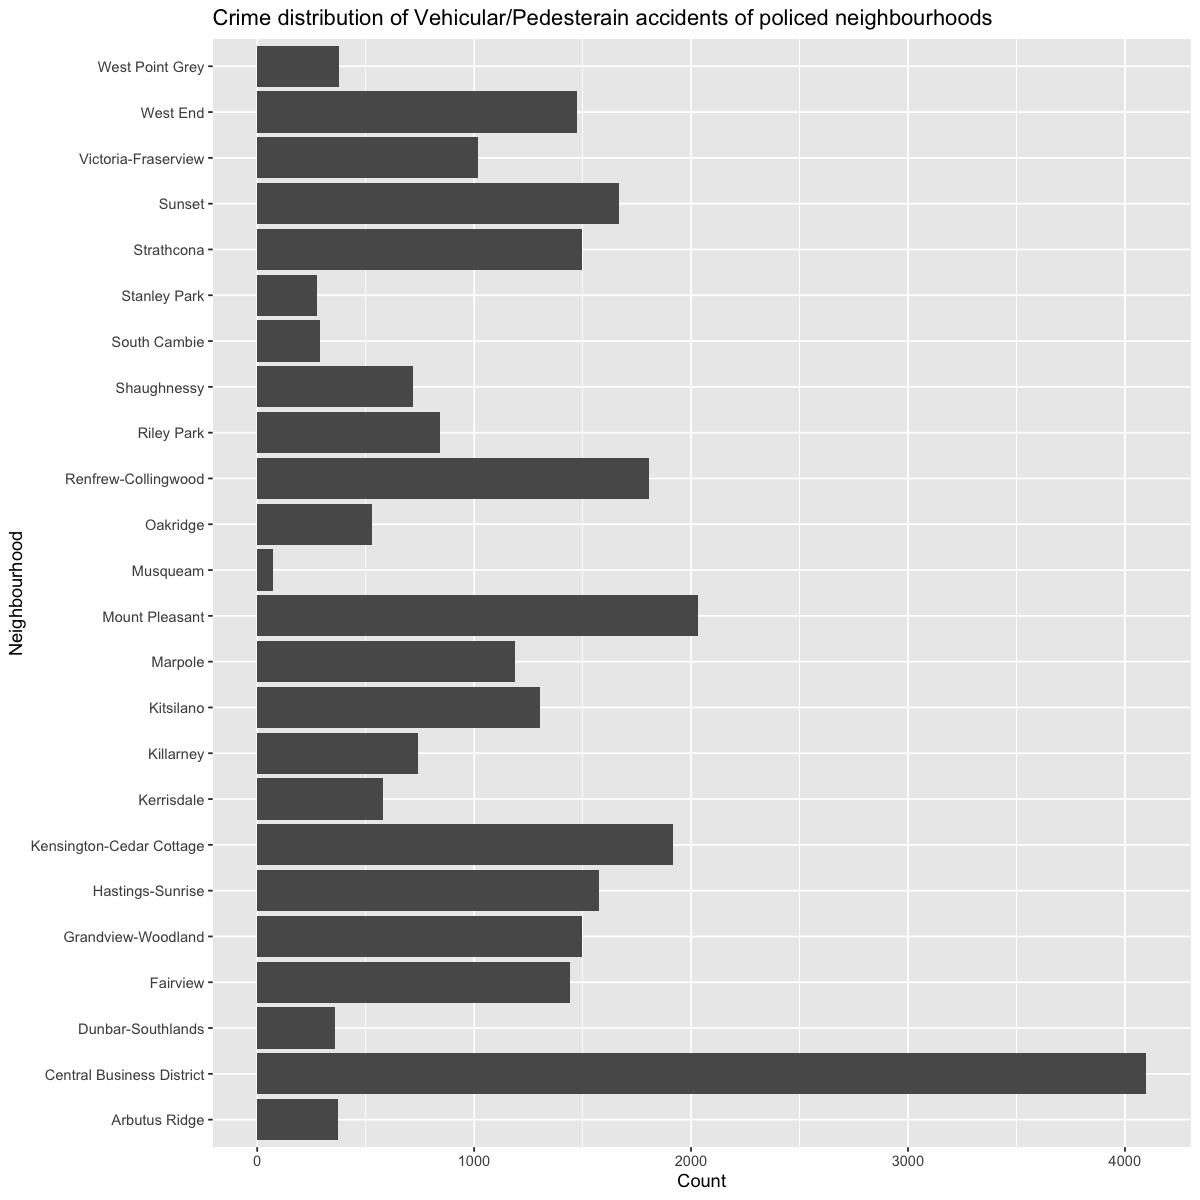

In [48]:
limited_dataset <- select(whole_dataset, TYPE, NEIGHBOURHOOD) %>%
    group_by(NEIGHBOURHOOD) %>% 
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | 
    TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")
head(limited_dataset)

options(repr.plot.width = 10, repr.plot.height = 10)
vehicular_ped_dist <- limited_dataset %>% 
    ggplot(aes(x = NEIGHBOURHOOD)) + 
    geom_histogram(stat = "count")+
    xlab("Neighbourhood") +
    ylab("Count") +
    ggtitle("Crime distribution of Vehicular/Pedesterain accidents of policed neighbourhoods") +
    coord_flip()
vehicular_ped_dist

mean_vehicle_crime_rate <- length(limited_dataset$TYPE) / length(unique(limited_dataset$NEIGHBOURHOOD))
mean_vehicle_crime_rate 
#This is the "mean" Vehicle/Pedestrian crime rate per neighbourhood policed.

## Methods: Plan

As our source data was obtained through the official government database, our analysis is representative of the true population and is relatively unbiased. While some types of crime may often go unreported (Baumer & Lauritsen, 2010), we feel that vehicle collisions are more often reported to police and insurance agencies, and thus this data is reasonably representative. The reproducibility of our results will also ensure that our conclusions are trustworthy and reliable.
 
However, these results will not be sufficient for a stakeholder and a more thorough analysis will be required. We plan to perform statistical testing, through Pearson's Chi-Squared test at a 95% confidence interval, as we develop our project. 
Namely:

$H_0:$ Vehical/pedestrian accidents for all neighbourhoods occur at the same rate to one another

$H_A:$ Vehical/pedestrian accidents for all neighbourhoods do not occur at the same rate to one another
 
Through our preliminary results, we expect to reject $H_0$ at a 5% significance level as the Central Business District has a far higher rate of accidents compared to all other neighbourhoods.
	
We expect to get a better understanding of how our current road designs are affecting collision rates in the city. These results can help city planners determine if certain neighbourhoods require additional safety infrastructure in addition to determining which areas require additional resources to reduce collision rates immediately. This information may also motivate the City of Vancouver to prioritize renewal plans for older areas and “poorer” areas of the city. This information could also be used by researchers developing self-driving technologies to reduce the chance of the vehicle being involved in such an incident. Furthermore, this project may lead to further questions on other factors that also increase the likelihood of vehicle collisions, such as specific weather or daylight conditions. This would account for a possible confounding variable.


In [49]:
#Results:
mean_crime <- whole_dataset %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(n = length(TYPE), prop = mean(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | 
    TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)"))
mean_crime

NEIGHBOURHOOD,n,prop
<chr>,<int>,<dbl>
Arbutus Ridge,8839,0.04231248
Central Business District,217437,0.01885144
Dunbar-Southlands,10842,0.03301974
Fairview,50862,0.02831190
Grandview-Woodland,46531,0.03217210
Hastings-Sunrise,28642,0.05502409
Kensington-Cedar Cottage,39015,0.04916058
Kerrisdale,10870,0.05326587
Killarney,15571,0.04746002


In [50]:
#95% CI
#We already have the sample proprotions calculated above, thus we can use them as p-hat
standard_error = mean_crime %>%
    mutate(se_p = sqrt((prop*(1-prop))/n))
head(standard_error)

NEIGHBOURHOOD,n,prop,se_p
<chr>,<int>,<dbl>,<dbl>
Arbutus Ridge,8839,0.04231248,0.0021411376
Central Business District,217437,0.01885144,0.0002916573
Dunbar-Southlands,10842,0.03301974,0.0017160934
Fairview,50862,0.02831190,0.0007354468
Grandview-Woodland,46531,0.03217210,0.0008180269
Hastings-Sunrise,28642,0.05502409,0.0013473646


In [51]:
#margin_of_error
margin_error = standard_error %>%
    mutate(me = 1.96 * se_p)
head(margin_error)
#We used 1.96 as its the z-score for 95% ci

NEIGHBOURHOOD,n,prop,se_p,me
<chr>,<int>,<dbl>,<dbl>,<dbl>
Arbutus Ridge,8839,0.04231248,0.0021411376,0.0041966297
Central Business District,217437,0.01885144,0.0002916573,0.0005716484
Dunbar-Southlands,10842,0.03301974,0.0017160934,0.0033635430
Fairview,50862,0.02831190,0.0007354468,0.0014414757
Grandview-Woodland,46531,0.03217210,0.0008180269,0.0016033327
Hastings-Sunrise,28642,0.05502409,0.0013473646,0.0026408346


In [52]:
#both endpoints
endpoints = margin_error %>%
    mutate(lower_endpoint = prop - me, upper_endpoint = prop + me) %>%
    select(-se_p, -me,-n)
endpoints
#below are the 95%CI for the true proportion value.

NEIGHBOURHOOD,prop,lower_endpoint,upper_endpoint
<chr>,<dbl>,<dbl>,<dbl>
Arbutus Ridge,0.04231248,0.03811585,0.04650911
Central Business District,0.01885144,0.01827979,0.01942309
Dunbar-Southlands,0.03301974,0.02965620,0.03638328
Fairview,0.02831190,0.02687043,0.02975338
Grandview-Woodland,0.03217210,0.03056877,0.03377543
Hastings-Sunrise,0.05502409,0.05238326,0.05766493
Kensington-Cedar Cottage,0.04916058,0.04701521,0.05130595
Kerrisdale,0.05326587,0.04904424,0.05748750
Killarney,0.04746002,0.04412035,0.05079969


mean_prop
<dbl>
0.04490974


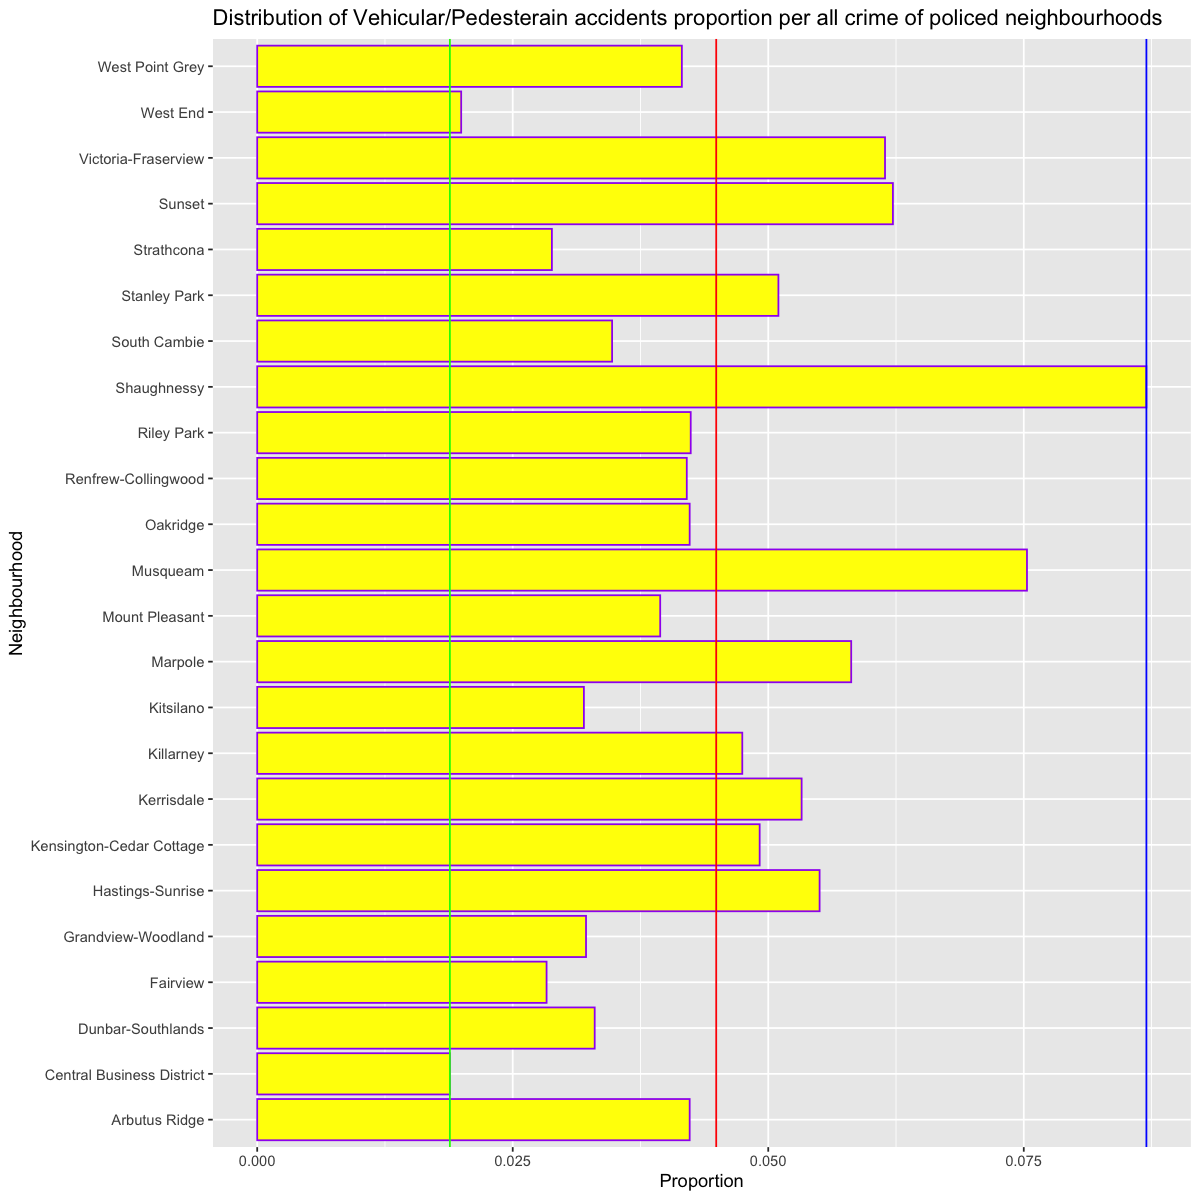

In [122]:
mean_prop = endpoints %>%
    summarize(mean_prop = mean(prop))
mean_prop

min_prop = endpoints %>%
    summarize(min_prop = min(prop))
max_prop = endpoints %>%
    summarize(max_prop = max(prop))
options(repr.plot.width = 10, repr.plot.height = 10)
graph <- endpoints %>%
    ggplot(aes(x = NEIGHBOURHOOD, y = prop))+
    geom_bar(stat = "identity", colour = "purple", fill = "yellow")+
    xlab("Neighbourhood") +
    ylab("Proportion") +
    ggtitle("Distribution of Vehicular/Pedesterain accidents proportion per all crime of policed neighbourhoods") +
    coord_flip() +
    geom_hline(yintercept=mean_prop$mean_prop, linetype = "solid", colour = "red") +
    geom_hline(yintercept=min_prop$min_prop, linetype = "solid", colour = "green")+
    geom_hline(yintercept=max_prop$max_prop, linetype = "solid", colour = "blue")
graph
#As you can see, while the mean of all the proportions is 0l04490974, and while most neighbourhoods are close to it, there are a
#few outliers, and the cause of these has to be determined so we can help make it more even across all neighbourhoods in Vancouver.
#The mean is represented by the red line, while the green represents the lowest proportion and the blue line the highest. 

In [60]:
print("Neighbourhood with highest proportion")
slice_max(endpoints, prop)
#Shaughnessy is the neighboruhood with the highest proportion of Vehicualr/Pedestarian Accidents compared to all crimes reported.

print("Neighbourhood with lowest proportion")
slice_min(endpoints, prop)
#The Central Business District is the neighboruhood with the lowest proportion of Vehicualr/Pedestarian Accidents compared to all crimes reported.

[1] "Neighbourhood with highest proportion"


NEIGHBOURHOOD,prop,lower_endpoint,upper_endpoint
<chr>,<dbl>,<dbl>,<dbl>
Shaughnessy,0.08699878,0.08090975,0.09308782


[1] "Neighbourhood with lowest proportion"


NEIGHBOURHOOD,prop,lower_endpoint,upper_endpoint
<chr>,<dbl>,<dbl>,<dbl>
Central Business District,0.01885144,0.01827979,0.01942309


As shown above, it appears as if the Shaughnessy neighbourhood has the highest proportion of Vehicle Collision or Pedestrian Struck (with Injury/Fatality) compared to all crime that was reported in that neighbourhood. The true proportion value as estimated by our sample is 0.08799878, with a 95% CI ranging from 0.08090975 to 0.09308782.

Also, it appears that the Central Businesss District has the lowest proportion of Vehicle Collision or Pedestrian Struck (with Injury/Fatality) compared to all crime that was reported in that neighbourhood. The true proportion value as estimated by our sample is 0.01885144, with a 95% CI ranging from 0.01827979 to 0.01942309.

To verify our intuition, we perform Pearson's Chi Squared Test. From the above cells, we know that the expected value ($E_k$) / mean ($\mu$) frequency is approximately 1153. Now we can compute the Chi Squared test statistic 
${\chi}^2=\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k} \sim {\chi}^2_{k-1}$ 
Where k is the number of categories (neighbourhoods), and n is the number of observations

The following cells demonstrate the full process of the Pearson's Chi Squared Test

In this cell, we compute the number of categories $k$ (in this case, the categories are the number of neighbourhoods) and the number of observations $n$

In [54]:
count_crime <- limited_dataset %>%
    group_by(NEIGHBOURHOOD) %>%
    count(NEIGHBOURHOOD) %>%
    pull(n) # turn column into vector for easier computations
#This is the observed number of crimes reproted in each neighbourhood in question

k <- length(count_crime) 
# This is the number of neighbourhoods.

Now, we have all the necessary information to compute the Chi-Squared test statistic $\chi^2$. 

In [55]:
test_stat <- 0
for (o in count_crime) { # summation function to obtain the Chi-Squared test statistic is achieved through a basic for-each loop
    test_stat = test_stat + (o - mean_vehicle_crime_rate)^2/mean_vehicle_crime_rate
}
test_stat

[1] 14804.4

As the test statistic has an extremely high value, we can infer that the p-value will be negligibly small, to confirm this intuition, we can use the `pchisq()` function with $k-1$ degrees of freedom

In [56]:
p_value <- pchisq(test_stat, k-1, lower.tail = FALSE)
p_value

[1] 0

For a sanity check we can use the `chisq.test()` function

In [57]:
chisq.test(count_crime)


	Chi-squared test for given probabilities

data:  count_crime
X-squared = 14804, df = 23, p-value < 2.2e-16


In [58]:
chisq.test(count_crime)


	Chi-squared test for given probabilities

data:  count_crime
X-squared = 14804, df = 23, p-value < 2.2e-16


Since our P-value is negligibly small ($<2.2\cdot10^{-16}\approx 0$), we know it is also less than $0.05$, thus we can reject the null hypothesis at a $5\%$ significant level in favour of the alternative hypothesis that vehical/pedestrian accidents for all neighbourhoods do not occur at the same rate to one another. This implies that certain neighbourhoods have higher rates of vehical/pedestrial accidents compared to others.

## Discussion

As one can see from our results, we have an incredibly small P-value. This means that our data is overwhelmingly in favour of our alternative hypothesis, which was that "vehicle/pedestrian accidents for all neighbourhoods do not occur at the same rate”. As we have determined that the Shaughnessy neighbourhood has the highest proportion of Vehicle Collision or Pedestrian Struck (with Injury/Fatality) compared to all crime that was reported in that neighbourhood, and the Central Business District showed the lowest proportion.

Thus there are some neighbourhoods where vehicle/pedestrian accidents occur at higher rates, possibly due to an external factor that can be controlled, such as the lack of crosswalks and additional road safety infrastructure, or the lack of policing that may encourage recklessness. The causes could be many different things but the effect endangers the life of humans, and more work needs to be done on making neighbourhoods like Shaughnessy safer. This first step now opens the door to other studies that can look at what those causes may be, and push for possible solutions, before this problem becomes any bigger or more dangerous. Getting ahead of the curve is necessary, and these small issues could become disastrous if left unchecked.

However, our analysis does not answer a broad scope of questions, but rather opens the door to this ever-worsening epidemic. The aim of this analysis was to guide future studies so we may determine any discernible pattern for the neighbourhoods that have higher collision rates. While we may not have been able to determine that we have successfully determined that there is a difference in the proportion of Vehicualar/Pedestarian Accidents depending on the neighbourhood, it is up to future studies to go deeper into this, and look determine the reasons for this difference. A question like "are the neighbourhoods that have a higher rate of vehicle/pedestrian accidents more socioeconomically disadvantaged" would have to be carried out in a separate study. Our study simply implies that there are indeed some heavy outliers and variations in vehicle/pedestrian accidents between the cities of Vancouver. Regardless, assuming that higher rates of vehicle/pedestrian accidents are correlated to lower socioeconomic neighbourhoods then our calculations done in our methods may serve as a guide to see which neighbourhoods may need the most help. 

A few potential sources of information for socioeconomic data include the 2021 Statistics Canada Census data (Statistics Canada, 2022) and recent Vancouver property tax assessment datasets (City of Vancouver & BC Assessment, 2022).  The City of Vancouver records may also contain information about the types of infrastructure and traffic control technologies deployed around the city. For example, future studies can see if neighbourhoods with more roundabout intersections have higher or lower accident rates (Mamlouk & Souliman, 2019). Similarly, the Transportation Data Collection Program data may provide other insight into congestion-related issues (City of Vancouver, 2022).

Additionally, the results found in our study were not very surprising considering that there are many outside factors and randomness that go into vehicle/pedestrian accidents and where they happen. Our results are in line with what we were expecting to find. However, our results show that something must indeed be done to further lower these accidents rates, especially in those neighbourhoods with especially high rates. Future studies will also guide how we may go about lowering the rates, which may involve finding factors to the commonness of these specific accidents. The number of factors that could potentially exist number more than we can talk about in our analysis, and we leave it up to another to pick up our torch and carry it on. 

## References:

Baumer, E. P., & Lauritsen, J. L. (2010). Reporting Crime to the Police, 1973–2005: A Multivariate Analysis of Long-Term Trends in the National Crime Survey (ncs) and National Crime Victimization Survey (ncvs)*. Criminology, 48(1), 131–185. https://doi.org/10.1111/j.1745-9125.2010.00182.x

City of Vancouver. (2022). Transportation Data Collection Program. https://vancouver.ca/streets-transportation/traffic-count-data.aspx

City of Vancouver, & BC Assessment. (2022). Property tax report 2020 [Data set]. Finance, Risk and Supply Chain Management - Revenue Services. https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/

Fecht, S. (2012, May 3). Accident-Zone: Poorer Neighborhoods Have Less-Safe Road Designs. Scientific American. https://www.scientificamerican.com/article/accident-zone-poorer-neighborhoods/

ICBC. (2021, October 19). ICBC warns about seasonal spike in pedestrian crashes. https://www.icbc.com:443/about-icbc/newsroom/Pages/2021-oct19.aspx

Mamlouk, M., & Souliman, B. (2019). Effect of traffic roundabouts on accident rate and severity in Arizona. Journal of Transportation Safety & Security, 11(4), 430–442. https://doi.org/10.1080/19439962.2018.1452812

Morency, P., Gauvin, L., Plante, C., Fournier, M., & Morency, C. (2012). Neighborhood Social Inequalities in Road Traffic Injuries: The Influence of Traffic Volume and Road Design. American Journal of Public Health, 102(6), 1112–1119. https://doi.org/10.2105/AJPH.2011.300528

Statistics Canada. (2022, February 9). Census Profile. 2021 Census of Population—Vancouver, City (CY). Statistics Canada Catalogue no. 98-316-X2021001. https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/index.cfm?Lang=E

VPD. (2022). Vancouver Police Department Open Data. https://geodash.vpd.ca/opendata/#

In [59]:
"Hello_World!"

[1] "Hello_World!"